In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("C:/Users/ASUS/Downloads/green_tech_data.csv")
print(data.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [4]:
# Check for null values
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [5]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


sustainability
0    85
1    15
Name: count, dtype: int64


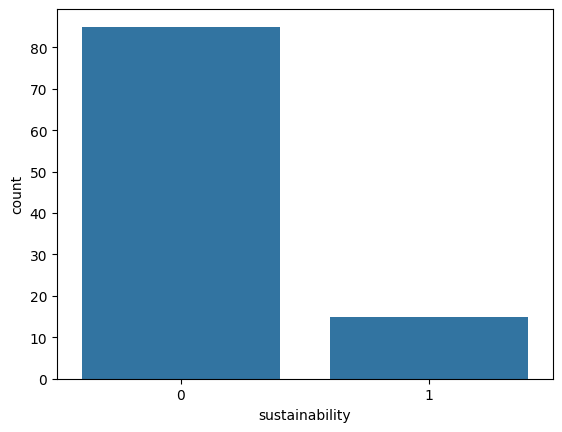

In [6]:
# Check for class imbalance
print(data['sustainability'].value_counts()) 
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

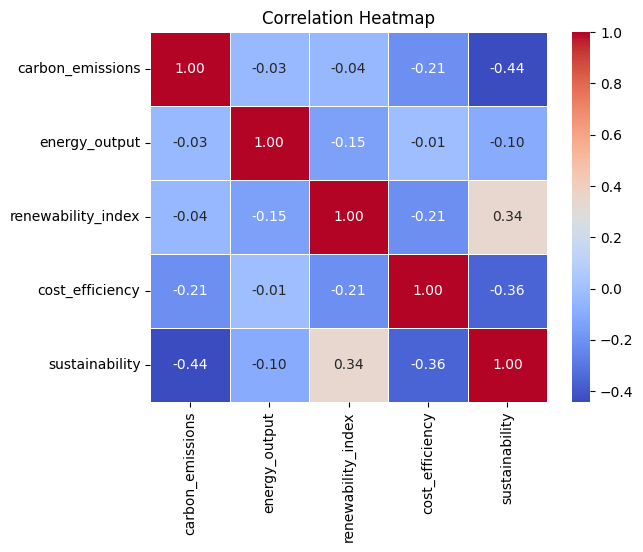

In [7]:
corr = data.corr()
# Generate the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [8]:
#define X and Y for column: carbon_emissions	energy_output	renewability_index	cost_efficiency	sustainability

X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
Y = data['sustainability']

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
xtrain.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [11]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [12]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


Confusion Matrix:
[[17  0]
 [ 1  2]]


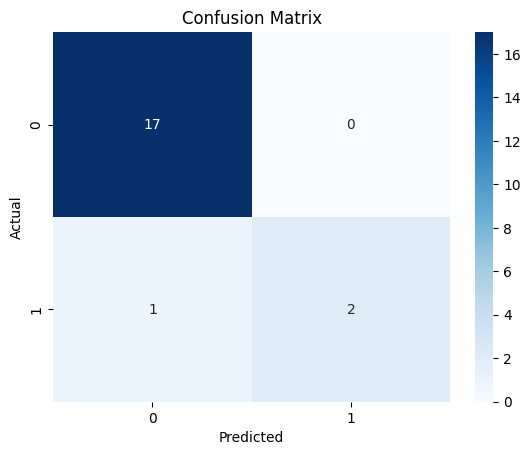

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [13]:
#confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

In [16]:
#classification report
cr = classification_report(ytest, ypred)
print("Classification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [18]:
#Feature Importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [19]:
import joblib

joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [21]:
import joblib
# Load the model from the file
model = joblib.load('lrmodel_sustainable.pkl')
# Example data for prediction
new_data = np.array([[22,25,60]])
# Make predictions
predictions = model.predict(new_data)
# Print the predictions
print(predictions)

[0]


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
